In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
movies = pd.read_csv('imdb.csv', encoding = 'latin1')


In [24]:
movies.shape

(15509, 10)

In [25]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
print(movies.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [6]:
movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Data Preprocessing


In [8]:
movies.shape

(15509, 10)

Checking null values


In [26]:
movies.dropna(inplace = True)

In [27]:
movies.shape

(5659, 10)

In [28]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [29]:
movies.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [30]:
iqr = 1.9
lower = 5-(1.5*iqr)
upper = 6.9+(1.5*iqr)
print(lower)
print(upper)

2.1500000000000004
9.75


In [31]:
movies.Rating.max()

10.0

In [32]:
movies.Rating.min()

1.1

In [48]:
movies['Votes']=movies['Votes'].str.replace(",","")

In [49]:
movies['Votes']=movies['Votes'].astype(int)

In [50]:
movies.describe()

,Rating,Votes
count,5632.000000,5632.000000
mean,5.916602,2653.054332
std,1.355231,13477.764046
min,2.200000,5.000000
25%,5.000000,30.000000
50%,6.100000,129.000000
75%,6.900000,913.000000
max,9.700000,591417.000000


In [51]:
iqr2 = 883
lower2 = 5-(1.5*883)
upper2 = 913 + (1.5*883)
print(lower2)
print(upper2)

-1319.5
2237.5


In [52]:
movies.Votes.max()

591417

In [53]:
movies.Votes.min()

5

Removing Outliers


In [43]:
movies = movies[((movies.Rating>lower) & (movies.Rating<upper))]

In [44]:
movies.shape

(5632, 10)

In [45]:
movies.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [47]:
columns = ['Name' , 'Year' , 'Duration' , 'Genre' , 'Rating' , 'Votes', 'Director' , 'Actor 1' , 'Actor 2', 'Actor 3']
for i in columns:
  print(movies[i].unique())

['#Gadhvi (He thought he was Gandhi)' '#Yaaram' '...Aur Pyaar Ho Gaya' ...
 'Zulm Ki Zanjeer' 'Zulmi' 'Zulm-O-Sitam']
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(2008)' '(1994)' '(2007)' '(2003)' '(1998)' '(1979)' '(1974)' '(2015)'
 '(2006)' '(1981)' '(2020)' '(1985)' '(2013)' '(2011)' '(1988)' '(1987)'
 '(1999)' '(1973)' '(1968)' '(1982)' '(1977)' '(1950)' '(1969)' '(1948)'
 '(1990)' '(1989)' '(2001)' '(2000)' '(1953)' '(1978)' '(1963)' '(1992)'
 '(1976)' '(1984)' '(1986)' '(1966)' '(1975)' '(1980)' '(1967)' '(1970)'
 '(1952)' '(1972)' '(1971)' '(1964)' '(1954)' '(1962)' '(1957)' '(1965)'
 '(1996)' '(1995)' '(1956)' '(1955)' '(1936)' '(1983)' '(1951)' '(1961)'
 '(1959)' '(1949)' '(1960)' '(1946)' '(1940)' '(1945)' '(1938)' '(1941)'
 '(1942)' '(1935)' '(1937)' '(1947)' '(1931)' '(1933)' '(1943)' '(1944)'
 '(1932)' '(1939)' '(1934)']
['109 min' '110 min' '147 min' '142 min' '82 min' 

In [54]:
movies.Genre.value_counts()

,count
Genre,
Drama,841
"Drama, Romance",330
"Action, Crime, Drama",329
"Action, Drama",205
"Comedy, Drama",204
...,...
"Comedy, Crime, Musical",1
"History, Romance",1
"Drama, History, Sport",1


In [56]:
genre = movies.Genre
print(genre)

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5632, dtype: object


In [58]:
list = movies.Genre.str.split(',')
print(list)

1                              [Drama]
3                   [Comedy,  Romance]
5           [Comedy,  Drama,  Musical]
6              [Drama,  Romance,  War]
8        [Horror,  Mystery,  Thriller]
                     ...              
15493                          [Drama]
15494    [Biography,  Drama,  History]
15503         [Action,  Crime,  Drama]
15505                 [Action,  Drama]
15508                 [Action,  Drama]
Name: Genre, Length: 5632, dtype: object


In [59]:
Genre_list=[ ]
for i in list:
  Genre_list.extend(i)
print(Genre_list)

['Drama', 'Comedy', ' Romance', 'Comedy', ' Drama', ' Musical', 'Drama', ' Romance', ' War', 'Horror', ' Mystery', ' Thriller', 'Action', ' Crime', ' Thriller', 'Drama', 'Horror', 'Horror', ' Romance', ' Thriller', 'Comedy', ' Drama', ' Romance', 'Comedy', ' Drama', 'Comedy', ' Drama', ' Romance', 'Crime', ' Drama', ' Mystery', 'Horror', ' Thriller', 'Comedy', ' Horror', 'Drama', ' Horror', ' Mystery', 'Drama', 'Drama', 'Action', ' Thriller', 'Action', 'Drama', 'Horror', ' Mystery', ' Romance', 'Horror', ' Mystery', 'Drama', ' Horror', ' Romance', 'Horror', ' Mystery', ' Romance', 'Action', ' Drama', ' History', 'Action', ' Drama', ' War', 'Thriller', 'Comedy', 'Adventure', ' Horror', ' Mystery', 'Action', ' Crime', ' Thriller', 'Comedy', ' Drama', ' Romance', 'Action', ' Sci-Fi', 'Crime', ' Mystery', ' Thriller', 'Comedy', 'Thriller', 'Drama', ' History', 'Sport', 'Biography', ' Drama', ' History', 'Drama', 'Horror', ' Romance', 'Comedy', ' Romance', 'Crime', ' Drama', 'Comedy', 'Come

In [60]:
Genres = [i.strip() for i in Genre_list]

In [61]:
df = pd.DataFrame(Genres)

In [62]:
df.head()

,0
0,Drama
1,Comedy
2,Romance
3,Comedy
4,Drama


Exploratory Data Analysis

[]

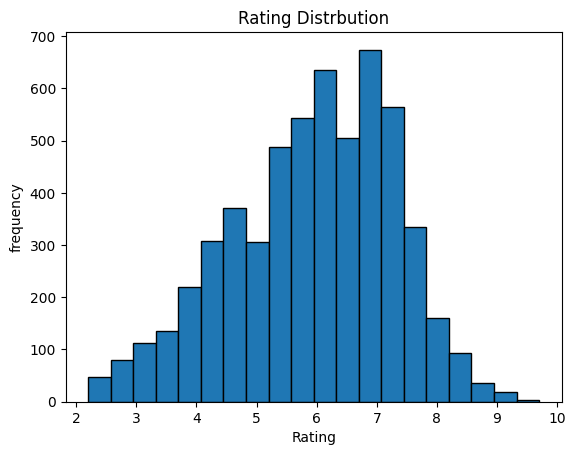

In [66]:
plt.hist(movies['Rating'],bins=20, edgecolor = 'black')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.title('Rating Distrbution')
plt.plot()

In [67]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


[]

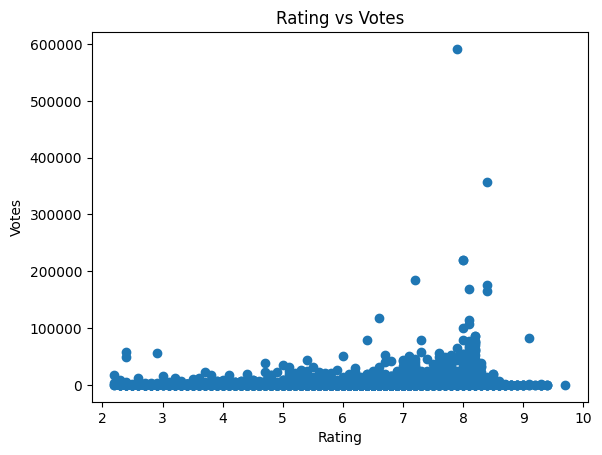

In [70]:
plt.scatter(movies['Rating'] , movies['Votes'])
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes')
plt.plot()

In [72]:
movies = movies[(movies['Actor 1'] != movies['Actor 2']) | (movies['Actor 2'] != movies['Actor 3']) | (movies['Actor 3'] != movies['Actor 1'])]

In [73]:
movies.shape

(5631, 10)

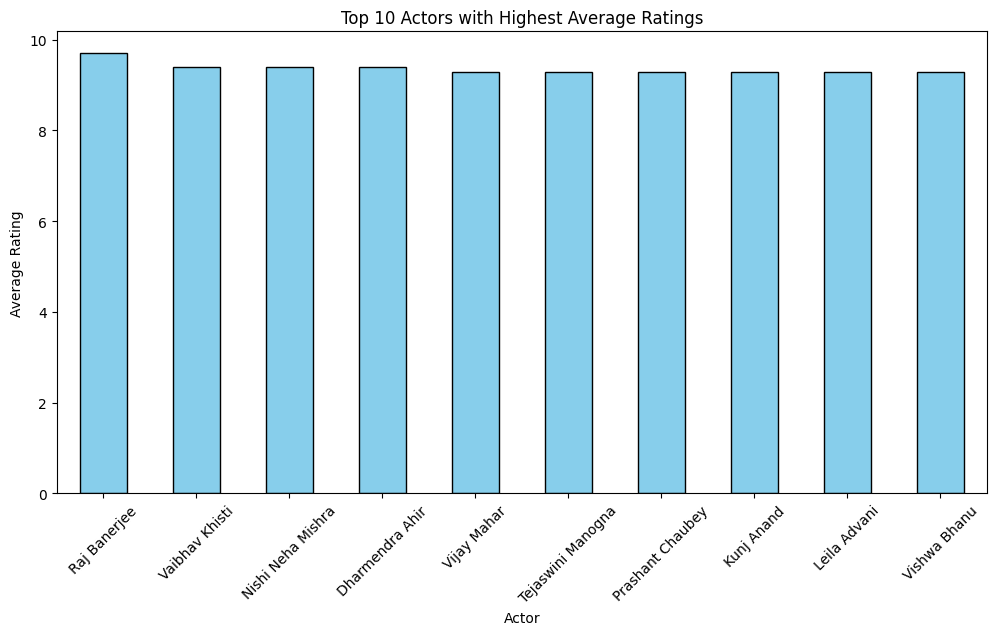

In [79]:
actor_ratings = movies.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
actor_ratings.head(10).plot(kind='bar', color='skyblue', edgecolor='black')


plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.title('Top 10 Actors with Highest Average Ratings')
plt.xticks(rotation=45)

plt.show()

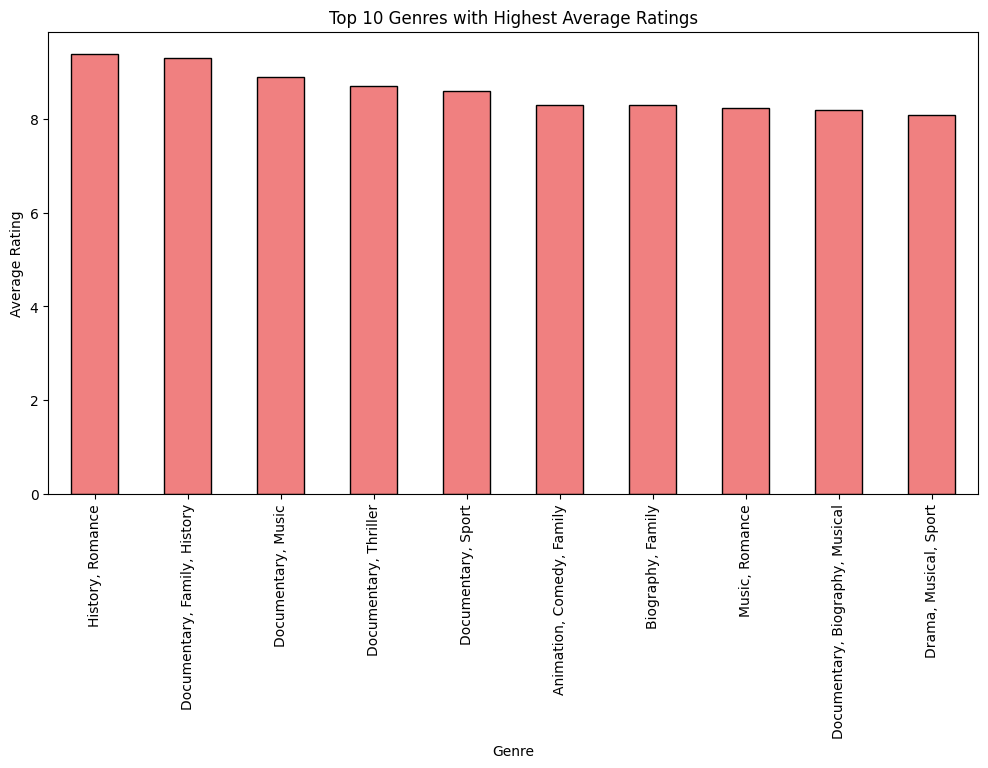

In [84]:
# Group by 'genre' column and calculate the average rating
genre_ratings = movies.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_ratings.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres with Highest Average Ratings')

plt.show()


Categorical Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']:
    movies[col] = le.fit_transform(movies[col].astype(str))
print(movies.head())


                                 Name  Year Duration  Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019  109 min    145     7.0      8   
3                             #Yaaram  2019  110 min     95     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997  147 min     65     4.7    827   
6                           ...Yahaan  2005  142 min    211     7.4   1086   
8                  ?: A Question Mark  2012   82 min    247     5.6    326   

   Director  Actor 1  Actor 2  Actor 3  
1       629     1347     2262      319  
3      1334     1193      717     2139  
5      1527      377       75     2037  
6      2036      690     1106     2514  
8       135     1927     1169     1012  


<ipython-input-86-fe8e9b4c6a74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col] = le.fit_transform(movies[col].astype(str))
<ipython-input-86-fe8e9b4c6a74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col] = le.fit_transform(movies[col].astype(str))
<ipython-input-86-fe8e9b4c6a74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [87]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,145,7.0,8,629,1347,2262,319
3,#Yaaram,2019,110 min,95,4.4,35,1334,1193,717,2139
5,...Aur Pyaar Ho Gaya,1997,147 min,65,4.7,827,1527,377,75,2037
6,...Yahaan,2005,142 min,211,7.4,1086,2036,690,1106,2514
8,?: A Question Mark,2012,82 min,247,5.6,326,135,1927,1169,1012


Feature Extraction

In [112]:
x = movies.drop(['Name','Year','Duration','Rating','Votes'], axis=1)
y = movies['Rating']

In [113]:
x

,Genre,Director,Actor 1,Actor 2,Actor 3
1,145,629,1347,2262,319
3,95,1334,1193,717,2139
5,65,1527,377,75,2037
6,211,2036,690,1106,2514
8,247,135,1927,1169,1012
...,...,...,...,...,...
15493,145,1223,1854,1795,1612
15494,39,2051,760,1613,1183
15503,201,1788,405,751,1681
15505,308,1025,111,2156,314


In [114]:
y

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
...,...
15493,6.1
15494,6.2
15503,5.8
15505,4.5


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
import tensorflow as tf
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam

In [117]:
model = Sequential()
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [118]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

In [122]:
model.fit(x_train,y_train,epochs=150)

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8000 - mse: 2.8000
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5373 - mse: 2.5373
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7412 - mse: 2.7412
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6245 - mse: 2.6245
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8002 - mse: 2.8002
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5261 - mse: 2.5261
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5672 - mse: 2.5672
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5852 - mse: 2.5852
Epoch 9/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4802 - mse: 2.4802
Epoch 10/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4822 - mse: 2.4822
Epoch 11/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5720 - mse: 2.5720
Epoch 12/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5425 - mse: 2.5425
Epoch 13/150


In [123]:
model.evaluate(x_test,y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9357 - mse: 1.9357


[1.8021976947784424, 1.8021976947784424]

In [121]:
y_pred = model.predict(x_test)
print("y predict is: ",y_pred)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
y predict is:  [[5.2187166]
 [6.6601524]
 [5.988783 ]
 ...
 [5.5383487]
 [7.3515377]
 [5.279295 ]]
